In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# kullanacağım algoritmalar.
# log.reg - svm - knn - decision tree - rand. forest - LightGBM
# rnn - cnn(conv1d kullan tek boyutluya indirge!!) - lstm - gru - mlp deeplearning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

red_wine_data = pd.read_csv('/content/drive/My Drive/wine_quality_dataset/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('/content/drive/My Drive/wine_quality_dataset/winequality-white.csv', sep=';')

# Kırmızı ve beyaz şaraplara ayırıcı bir sütun ekleme
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

# Veri setlerini birleştirme
combined_data = pd.concat([red_wine_data, white_wine_data], axis=0).reset_index(drop=True)

# Eksik değer kontrolü
print("Eksik Değer Kontrolü:\n", combined_data.isnull().sum())

#  (type) one-hot encode
combined_data_encoded = pd.get_dummies(combined_data, columns=['type'], drop_first=True)

# Özellik ve hedef değişkenleri ayır
X = combined_data_encoded.drop('quality', axis=1)
y = combined_data_encoded['quality']

# Eğitim ve test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Veri Hazırlama Tamamlandı!")


Eksik Değer Kontrolü:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
Veri Hazırlama Tamamlandı!


In [3]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Özellik seçimi işlemi
n_features = 8  # Seçilecek en önemli özellik sayısı
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=n_features)

# Eğitim verisinde özellik seçimi
X_train_selected = rfe_selector.fit_transform(X_train_scaled, y_train)

# Test verisinde aynı özellikleri kullan
X_test_selected = rfe_selector.transform(X_test_scaled)


selected_features = X.columns[rfe_selector.support_]
print("Seçilen Özellikler:", selected_features)


Seçilen Özellikler: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


In [4]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# classweight hesaplama
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Sınıf Ağırlıkları:", class_weights_dict)


Sınıf Ağırlıkları: {3: 30.93452380952381, 4: 4.291494632535095, 5: 0.4341687552213868, 6: 0.32720518793678777, 7: 0.8602880317828174, 8: 4.820964749536178, 9: 185.60714285714286}


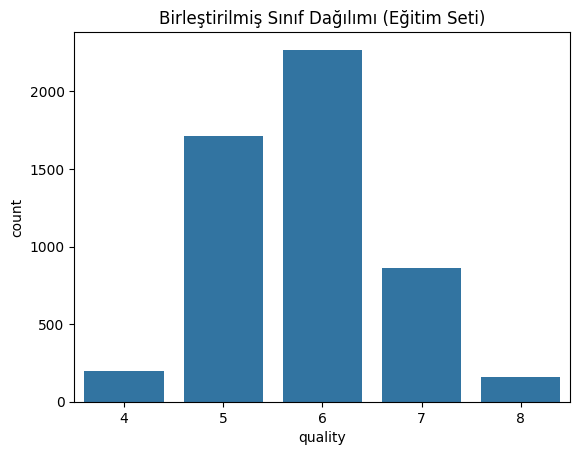

Sınıfların Birleştirilmesinden Sonra Eğitim Verisi Dağılımı:
 quality
6    2269
5    1710
7     863
4     197
8     158
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sınıf birleştirme
y_train_merged = y_train.replace({3: 4, 9: 8})
y_test_merged = y_test.replace({3: 4, 9: 8})

# Birleşmiş sınıfların dağılımı!!
sns.countplot(x=y_train_merged)
plt.title("Birleştirilmiş Sınıf Dağılımı (Eğitim Seti)")
plt.show()

print("Sınıfların Birleştirilmesinden Sonra Eğitim Verisi Dağılımı:\n", y_train_merged.value_counts())


In [6]:
# Temel Logistic Regression !!
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_model.predict(X_test_scaled)


logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy (Temel Model):", logistic_accuracy)
print("Logistic Regression Classification Report:\n", logistic_classification_report)


Logistic Regression Accuracy (Temel Model): 0.5407692307692308
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.05      0.09        43
           5       0.58      0.54      0.56       428
           6       0.52      0.72      0.60       567
           7       0.54      0.29      0.38       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.38      0.23      0.23      1300
weighted avg       0.54      0.54      0.51      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# Logistic Regression (class_weight ve feature selection ile) !!

from sklearn.linear_model import LogisticRegression

logistic_model_cw_fs = LogisticRegression(max_iter=1000, class_weight=class_weights_dict)
logistic_model_cw_fs.fit(X_train_selected, y_train)
y_pred_logistic_cw_fs = logistic_model_cw_fs.predict(X_test_selected)


print("Logistic Regression (Class Weight + Feature Selection) Accuracy:", accuracy_score(y_test, y_pred_logistic_cw_fs))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_cw_fs))

Logistic Regression (Class Weight + Feature Selection) Accuracy: 0.27076923076923076
Classification Report:
               precision    recall  f1-score   support

           3       0.01      0.17      0.01         6
           4       0.10      0.51      0.17        43
           5       0.57      0.32      0.41       428
           6       0.59      0.23      0.34       567
           7       0.28      0.22      0.25       216
           8       0.06      0.31      0.10        39
           9       0.00      0.00      0.00         1

    accuracy                           0.27      1300
   macro avg       0.23      0.25      0.18      1300
weighted avg       0.50      0.27      0.33      1300



In [8]:
# Logistic Regression modeli (sınıf birleştirme ile)
logistic_model_merged = LogisticRegression(max_iter=1000)
logistic_model_merged.fit(X_train_scaled, y_train_merged)
y_pred_logistic_merged = logistic_model_merged.predict(X_test_scaled)


print("Logistic Regression (Sınıf Birleştirme) Accuracy:", accuracy_score(y_test_merged, y_pred_logistic_merged))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_logistic_merged))

Logistic Regression (Sınıf Birleştirme) Accuracy: 0.5415384615384615
Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.06      0.12        49
           5       0.58      0.54      0.56       428
           6       0.52      0.72      0.60       567
           7       0.54      0.29      0.38       216
           8       0.00      0.00      0.00        40

    accuracy                           0.54      1300
   macro avg       0.53      0.32      0.33      1300
weighted avg       0.55      0.54      0.51      1300



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree modeli
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)


decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_classification_report = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Accuracy (Temel Model):", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_classification_report)


Decision Tree Accuracy (Temel Model): 0.5938461538461538
Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.16      0.12      0.13        43
           5       0.66      0.64      0.65       428
           6       0.64      0.63      0.63       567
           7       0.50      0.56      0.53       216
           8       0.31      0.38      0.34        39
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.32      0.33      0.33      1300
weighted avg       0.59      0.59      0.59      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Decision Tree Modeli (class_weight ve seçilen özelliklerle)
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_model.fit(X_train_selected, y_train)  # Seçilen özelliklerle eğitiyorzu
y_pred_decision_tree = decision_tree_model.predict(X_test_selected)


accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
report_dt = classification_report(y_test, y_pred_decision_tree)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Accuracy: 0.5976923076923077
Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.14      0.17      0.15         6
           4       0.15      0.14      0.14        43
           5       0.66      0.61      0.63       428
           6       0.64      0.64      0.64       567
           7       0.52      0.60      0.56       216
           8       0.43      0.41      0.42        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.36      0.37      0.36      1300
weighted avg       0.60      0.60      0.60      1300



In [11]:
# Decision Tree Class Merged ile !!
decision_tree_merged = DecisionTreeClassifier(random_state=42)
decision_tree_merged.fit(X_train_scaled, y_train_merged)
y_pred_merged = decision_tree_merged.predict(X_test_scaled)


accuracy_merged = accuracy_score(y_test_merged, y_pred_merged)
report_merged = classification_report(y_test_merged, y_pred_merged)

print("Decision Tree Accuracy (Merged Classes):", accuracy_merged)
print("Decision Tree Classification Report (Merged Classes):\n", report_merged)


Decision Tree Accuracy (Merged Classes): 0.6015384615384616
Decision Tree Classification Report (Merged Classes):
               precision    recall  f1-score   support

           4       0.21      0.14      0.17        49
           5       0.67      0.65      0.66       428
           6       0.64      0.63      0.63       567
           7       0.50      0.56      0.53       216
           8       0.38      0.40      0.39        40

    accuracy                           0.60      1300
   macro avg       0.48      0.48      0.48      1300
weighted avg       0.60      0.60      0.60      1300



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modeli
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin
y_pred_rf = random_forest_model.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy (Temel Model):", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)


Random Forest Accuracy (Temel Model): 0.6907692307692308
Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.57      0.09      0.16        43
           5       0.74      0.72      0.73       428
           6       0.67      0.79      0.72       567
           7       0.66      0.58      0.62       216
           8       0.93      0.36      0.52        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.51      0.36      0.39      1300
weighted avg       0.69      0.69      0.68      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Random Forest modeli (class weight ve feature selection ile)
random_forest_cw_fs = RandomForestClassifier(class_weight='balanced', random_state=42)
random_forest_cw_fs.fit(X_train_selected, y_train)
y_pred_random_forest_cw_fs = random_forest_cw_fs.predict(X_test_selected)


print("Random Forest (Class Weight + Feature Selection) Accuracy:", accuracy_score(y_test, y_pred_random_forest_cw_fs))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest_cw_fs))


Random Forest (Class Weight + Feature Selection) Accuracy: 0.6876923076923077
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.12      0.19        43
           5       0.73      0.71      0.72       428
           6       0.66      0.78      0.71       567
           7       0.69      0.58      0.63       216
           8       1.00      0.36      0.53        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.51      0.36      0.40      1300
weighted avg       0.69      0.69      0.68      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Random Forest modeli (sınıf birleştirme ile)
random_forest_merged = RandomForestClassifier(random_state=42)
random_forest_merged.fit(X_train_scaled, y_train_merged)
y_pred_random_forest_merged = random_forest_merged.predict(X_test_scaled)


print("Random Forest (Sınıf Birleştirme) Accuracy:", accuracy_score(y_test_merged, y_pred_random_forest_merged))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_random_forest_merged))


Random Forest (Sınıf Birleştirme) Accuracy: 0.6838461538461539
Classification Report:
               precision    recall  f1-score   support

           4       0.57      0.08      0.14        49
           5       0.74      0.72      0.73       428
           6       0.65      0.77      0.71       567
           7       0.66      0.57      0.61       216
           8       1.00      0.33      0.49        40

    accuracy                           0.68      1300
   macro avg       0.72      0.50      0.54      1300
weighted avg       0.69      0.68      0.67      1300



In [15]:
from sklearn.neighbors import KNeighborsClassifier

# KNN modeli
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_classification_report = classification_report(y_test, y_pred_knn)

print("KNN Accuracy (Temel Model):", knn_accuracy)
print("KNN Classification Report:\n", knn_classification_report)


KNN Accuracy (Temel Model): 0.5584615384615385
KNN Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.09      0.11        43
           5       0.59      0.61      0.60       428
           6       0.57      0.62      0.60       567
           7       0.53      0.49      0.50       216
           8       0.31      0.10      0.15        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.31      0.27      0.28      1300
weighted avg       0.54      0.56      0.55      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# KNN modeli (class weight uygulanamaz!!!, sadece feature selection)
knn_cw_fs = KNeighborsClassifier(n_neighbors=5)
knn_cw_fs.fit(X_train_selected, y_train)
y_pred_knn_cw_fs = knn_cw_fs.predict(X_test_selected)


print("KNN (Feature Selection) Accuracy:", accuracy_score(y_test, y_pred_knn_cw_fs))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_cw_fs))


KNN (Feature Selection) Accuracy: 0.5592307692307692
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.09      0.11        43
           5       0.58      0.59      0.59       428
           6       0.59      0.65      0.62       567
           7       0.50      0.45      0.47       216
           8       0.33      0.13      0.19        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.31      0.27      0.28      1300
weighted avg       0.55      0.56      0.55      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# KNN modeli (sınıf birleştirme ile)
knn_merged = KNeighborsClassifier(n_neighbors=5)
knn_merged.fit(X_train_scaled, y_train_merged)
y_pred_knn_merged = knn_merged.predict(X_test_scaled)


print("KNN (Sınıf Birleştirme) Accuracy:", accuracy_score(y_test_merged, y_pred_knn_merged))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_knn_merged))


KNN (Sınıf Birleştirme) Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           4       0.23      0.14      0.18        49
           5       0.59      0.61      0.60       428
           6       0.57      0.62      0.60       567
           7       0.53      0.49      0.50       216
           8       0.31      0.10      0.15        40

    accuracy                           0.56      1300
   macro avg       0.45      0.39      0.41      1300
weighted avg       0.55      0.56      0.55      1300



In [18]:
from sklearn.svm import SVC

# SVM modeli
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)


svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

print("SVM Accuracy (Temel Model):", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)


SVM Accuracy (Temel Model): 0.5723076923076923
SVM Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        43
           5       0.64      0.60      0.62       428
           6       0.54      0.76      0.63       567
           7       0.56      0.25      0.35       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.39      0.23      0.24      1300
weighted avg       0.57      0.57      0.54      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# SVM modeli (class weight ve feature selection ile)
svm_cw_fs = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_cw_fs.fit(X_train_selected, y_train)
y_pred_svm_cw_fs = svm_cw_fs.predict(X_test_selected)


print("SVM (Class Weight + Feature Selection) Accuracy:", accuracy_score(y_test, y_pred_svm_cw_fs))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_cw_fs))


SVM (Class Weight + Feature Selection) Accuracy: 0.29
Classification Report:
               precision    recall  f1-score   support

           3       0.01      0.17      0.01         6
           4       0.13      0.58      0.21        43
           5       0.54      0.36      0.43       428
           6       0.57      0.22      0.32       567
           7       0.31      0.26      0.28       216
           8       0.08      0.44      0.14        39
           9       0.02      1.00      0.04         1

    accuracy                           0.29      1300
   macro avg       0.23      0.43      0.20      1300
weighted avg       0.48      0.29      0.34      1300



In [20]:
# SVM modeli (sınıf birleştirme ile)
svm_merged = SVC(kernel='linear', random_state=42)
svm_merged.fit(X_train_scaled, y_train_merged)
y_pred_svm_merged = svm_merged.predict(X_test_scaled)


print("SVM (Sınıf Birleştirme) Accuracy:", accuracy_score(y_test_merged, y_pred_svm_merged))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_svm_merged))


SVM (Sınıf Birleştirme) Accuracy: 0.5223076923076924
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        49
           5       0.59      0.56      0.57       428
           6       0.49      0.78      0.60       567
           7       0.00      0.00      0.00       216
           8       0.00      0.00      0.00        40

    accuracy                           0.52      1300
   macro avg       0.22      0.27      0.23      1300
weighted avg       0.41      0.52      0.45      1300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Temel LightGBM modeli
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)


y_pred_lgbm = lgbm_model.predict(X_test_scaled)


accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

print("LightGBM Temel Model Accuracy:", accuracy_lgbm)
print("LightGBM Temel Model Classification Report:\n", report_lgbm)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.518884
[LightGBM] [Info] Start training from score -7.169542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

In [22]:
# LightGBM modeli (class weight ve feature selection ile)
import lightgbm as lgb

lgbm_cw_fs = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_cw_fs.fit(X_train_selected, y_train)
y_pred_lgbm_cw_fs = lgbm_cw_fs.predict(X_test_selected)

# Performans değerlendirme
print("LightGBM (Class Weight + Feature Selection) Accuracy:", accuracy_score(y_test, y_pred_lgbm_cw_fs))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm_cw_fs))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 8
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM (Class Weight + Feature Selection) Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.29      0.26      0.27        43
           5  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

In [23]:
# LightGBM modeli (sınıf birleştirme ile)
lgbm_merged = lgb.LGBMClassifier(random_state=42)
lgbm_merged.fit(X_train_scaled, y_train_merged)
y_pred_lgbm_merged = lgbm_merged.predict(X_test_scaled)


print("LightGBM (Sınıf Birleştirme) Accuracy:", accuracy_score(y_test_merged, y_pred_lgbm_merged))
print("Classification Report:\n", classification_report(y_test_merged, y_pred_lgbm_merged))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -3.272633
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.493242
LightGBM (Sınıf Birleştirme) Accuracy: 0.6546153846153846
Classification Report:
               precision    recall  f1-score   support

           4       0.43      0.20      0.28        49
           5       0.69      0.68      0.68       428
           6       0.65      0.72      0.68       567
           7       0.62      0.58      0.60       216
           8       0.78      0.35      0.48        40

    accuracy                      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulama
# Setting k_neighbors to a smaller value, like '3', to ensure it's less than the smallest minority class size.!!!!!!!!!!!!!!!!??
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"SMOTE sonrası eğitim veri seti boyutu: {X_train_smote.shape[0]} örnek")




SMOTE sonrası eğitim veri seti boyutu: 15883 örnek


In [25]:
# Logistic Regression için hiperparametre opt.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Sınıf birleştirme
y_train_smote_merged = y_train_smote.replace({3: 4, 9: 8})
y_test_merged = y_test.replace({3: 4, 9: 8})

# Logistic Regression için hiperparametre aralığı
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Düzenleme katsayıları
    'solver': ['liblinear', 'lbfgs'],  # Çözümleyiciler
    'penalty': ['l2']  # L1 düzenlemesi liblinear ile uyumlu değilmiş!!!
}

# Logistic Regression için Grid Search
grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                             param_grid=param_grid_logistic, scoring='accuracy', cv=5, n_jobs=-1)


grid_logistic.fit(X_train_smote, y_train_smote_merged)


print("En iyi hiperparametreler (Logistic Regression):", grid_logistic.best_params_)
print("En iyi doğruluk (Logistic Regression):", grid_logistic.best_score_)


y_pred_logistic_optimized = grid_logistic.best_estimator_.predict(X_test_scaled)


accuracy_logistic_optimized = accuracy_score(y_test_merged, y_pred_logistic_optimized)
print("Logistic Regression (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_logistic_optimized)


report_logistic_optimized = classification_report(y_test_merged, y_pred_logistic_optimized, zero_division=1)
print("Logistic Regression (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_logistic_optimized)


En iyi hiperparametreler (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
En iyi doğruluk (Logistic Regression): 0.53863448241414
Logistic Regression (Sınıf Birleştirme + Optimizasyon) Accuracy: 0.2523076923076923
Logistic Regression (Sınıf Birleştirme + Optimizasyon) Classification Report:
               precision    recall  f1-score   support

           4       0.07      0.69      0.13        49
           5       0.58      0.29      0.39       428
           6       0.63      0.18      0.28       567
           7       0.29      0.20      0.24       216
           8       0.07      0.55      0.13        40

    accuracy                           0.25      1300
   macro avg       0.33      0.38      0.23      1300
weighted avg       0.52      0.25      0.30      1300



In [26]:
# Decision Tree için hiperparametre opt.
from sklearn.tree import DecisionTreeClassifier

# Sınıf birleştirme
y_train_smote_merged = y_train_smote.replace({3: 4, 9: 8})
y_test_merged = y_test.replace({3: 4, 9: 8})

# Decision Tree için hiperparametre aralığı
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid_tree, scoring='accuracy', cv=5, n_jobs=-1)

# Eğitim
grid_tree.fit(X_train_smote, y_train_smote_merged)

# En iyi parametreler ve doğruluk skoru
print("En iyi hiperparametreler (Decision Tree):", grid_tree.best_params_)
print("En iyi doğruluk (Decision Tree):", grid_tree.best_score_)

# Test setinde tahmin
y_pred_tree_optimized = grid_tree.best_estimator_.predict(X_test_scaled)

# Performans değerlendirme
accuracy_tree_optimized = accuracy_score(y_test_merged, y_pred_tree_optimized)
print("Decision Tree (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_tree_optimized)

# Classification Report
report_tree_optimized = classification_report(y_test_merged, y_pred_tree_optimized, zero_division=1)
print("Decision Tree (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_tree_optimized)


En iyi hiperparametreler (Decision Tree): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
En iyi doğruluk (Decision Tree): 0.735754882582542
Decision Tree (Sınıf Birleştirme + Optimizasyon) Accuracy: 0.4053846153846154
Decision Tree (Sınıf Birleştirme + Optimizasyon) Classification Report:
               precision    recall  f1-score   support

           4       0.08      0.37      0.13        49
           5       0.56      0.49      0.53       428
           6       0.58      0.32      0.41       567
           7       0.37      0.46      0.41       216
           8       0.18      0.47      0.26        40

    accuracy                           0.41      1300
   macro avg       0.35      0.42      0.35      1300
weighted avg       0.51      0.41      0.43      1300



In [27]:
# Random Forest için hiperparametre opt.
from sklearn.ensemble import RandomForestClassifier

# Random Forest için hiperparametre aralığı
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],  # Daha küçük max_depth
    'min_samples_split': [5],
    'min_samples_leaf': [3],
    'bootstrap': [True]
}

# Grid Search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf, scoring='accuracy', cv=3, n_jobs=-1)


grid_rf.fit(X_train_smote, y_train_smote_merged)


print("En iyi hiperparametreler (Random Forest):", grid_rf.best_params_)
print("En iyi doğruluk (Random Forest):", grid_rf.best_score_)

# Test setinde tahmin
y_pred_rf_optimized = grid_rf.best_estimator_.predict(X_test_scaled)


accuracy_rf_optimized = accuracy_score(y_test_merged, y_pred_rf_optimized)
print("Random Forest (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_rf_optimized)


report_rf_optimized = classification_report(y_test_merged, y_pred_rf_optimized, zero_division=1)
print("Random Forest (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_rf_optimized)


En iyi hiperparametreler (Random Forest): {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
En iyi doğruluk (Random Forest): 0.7833543511822733
Random Forest (Sınıf Birleştirme + Optimizasyon) Accuracy: 0.4976923076923077
Random Forest (Sınıf Birleştirme + Optimizasyon) Classification Report:
               precision    recall  f1-score   support

           4       0.13      0.53      0.21        49
           5       0.61      0.57      0.59       428
           6       0.65      0.38      0.48       567
           7       0.48      0.63      0.55       216
           8       0.27      0.55      0.36        40

    accuracy                           0.50      1300
   macro avg       0.43      0.53      0.44      1300
weighted avg       0.58      0.50      0.52      1300



In [28]:
# KNN için hiperparametre opt.
from sklearn.neighbors import KNeighborsClassifier

# KNN için hiperparametre aralığı
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid=param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)


grid_knn.fit(X_train_smote, y_train_smote_merged)


print("En iyi hiperparametreler (KNN):", grid_knn.best_params_)
print("En iyi doğruluk (KNN):", grid_knn.best_score_)

# Test setinde tahmin
y_pred_knn_optimized = grid_knn.best_estimator_.predict(X_test_scaled)


accuracy_knn_optimized = accuracy_score(y_test_merged, y_pred_knn_optimized)
print("KNN (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_knn_optimized)


report_knn_optimized = classification_report(y_test_merged, y_pred_knn_optimized, zero_division=1)
print("KNN (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_knn_optimized)


En iyi hiperparametreler (KNN): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
En iyi doğruluk (KNN): 0.8958024418264463
KNN (Sınıf Birleştirme + Optimizasyon) Accuracy: 0.6192307692307693
KNN (Sınıf Birleştirme + Optimizasyon) Classification Report:
               precision    recall  f1-score   support

           4       0.22      0.41      0.29        49
           5       0.71      0.68      0.69       428
           6       0.73      0.57      0.64       567
           7       0.54      0.69      0.60       216
           8       0.28      0.55      0.37        40

    accuracy                           0.62      1300
   macro avg       0.50      0.58      0.52      1300
weighted avg       0.66      0.62      0.63      1300



In [29]:
# SVM için hiperparametre opt.
from sklearn.svm import SVC

# SVM için hiperparametre aralığı
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid Search
grid_svm = GridSearchCV(SVC(random_state=42),
                        param_grid=param_grid_svm, scoring='accuracy', cv=5, n_jobs=-1)

# Eğitim
grid_svm.fit(X_train_scaled, y_train.replace({3: 4, 9: 8}))

# En iyi parametreler ve doğruluk skoru
print("En iyi hiperparametreler (SVM):", grid_svm.best_params_)
print("En iyi doğruluk (SVM):", grid_svm.best_score_)

# Test setinde tahmin
y_pred_svm_optimized = grid_svm.best_estimator_.predict(X_test_scaled)

# Performans değerlendirme
accuracy_svm_optimized = accuracy_score(y_test.replace({3: 4, 9: 8}), y_pred_svm_optimized)
print("SVM (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_svm_optimized)

# Classification Report
report_svm_optimized = classification_report(y_test.replace({3: 4, 9: 8}), y_pred_svm_optimized, zero_division=1)
print("SVM (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_svm_optimized)


En iyi hiperparametreler (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
En iyi doğruluk (SVM): 0.5861131265269861
SVM (Sınıf Birleştirme + Optimizasyon) Accuracy: 0.5838461538461538
SVM (Sınıf Birleştirme + Optimizasyon) Classification Report:
               precision    recall  f1-score   support

           4       0.25      0.08      0.12        49
           5       0.63      0.61      0.62       428
           6       0.57      0.72      0.64       567
           7       0.56      0.39      0.46       216
           8       0.43      0.07      0.13        40

    accuracy                           0.58      1300
   macro avg       0.49      0.38      0.39      1300
weighted avg       0.57      0.58      0.57      1300



In [30]:
from sklearn.model_selection import GridSearchCV

# LightGBM için hiperparametre aralığı
param_grid_lgbm = {
    'n_estimators': [100],  # Daha az değer
    'learning_rate': [0.05],  # Tek bir öğrenme oranı
    'max_depth': [5, 10],  # Daha az derinlik seçeneği
    'boosting_type': ['gbdt']  # Sadece 'gbdt' tipi kullanıldı
}

# Grid Search
grid_lgbm = GridSearchCV(LGBMClassifier(random_state=42),
                         param_grid=param_grid_lgbm, scoring='accuracy', cv=5, n_jobs=-1)

# Eğitim
grid_lgbm.fit(X_train_scaled, y_train.replace({3: 4, 9: 8}))

# En iyi parametreler ve doğruluk skoru
print("En iyi hiperparametreler (LightGBM):", grid_lgbm.best_params_)
print("En iyi doğruluk (LightGBM):", grid_lgbm.best_score_)

# Test setinde tahmin
y_pred_lgbm_optimized = grid_lgbm.best_estimator_.predict(X_test_scaled)

# Performans değerlendirme
accuracy_lgbm_optimized = accuracy_score(y_test.replace({3: 4, 9: 8}), y_pred_lgbm_optimized)
print("LightGBM (Sınıf Birleştirme + Optimizasyon) Accuracy:", accuracy_lgbm_optimized)

# Classification Report
report_lgbm_optimized = classification_report(y_test.replace({3: 4, 9: 8}), y_pred_lgbm_optimized, zero_division=1)
print("LightGBM (Sınıf Birleştirme + Optimizasyon) Classification Report:\n", report_lgbm_optimized)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -3.272633
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.493242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Label Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))


activation_functions = ['relu', 'sigmoid', 'tanh']

for activation in activation_functions:
    print(f"\n--- MLP ile {activation.upper()} aktivasyonu ---")

    # MLP Modeli
    mlp_model = Sequential()
    mlp_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Giriş katmanı
    mlp_model.add(Dense(256, activation=activation))
    mlp_model.add(BatchNormalization())  # Normalizasyon
    mlp_model.add(Dropout(0.3))  # Aşırı öğrenmeyi engellemek için dropout
    mlp_model.add(Dense(128, activation=activation))
    mlp_model.add(Dropout(0.3))
    mlp_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  # Çıkış katmanı (çok sınıflı sınıflandırma)

    # Model derleme
    mlp_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping???
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    mlp_model.fit(X_train_scaled, y_train_encoded, validation_split=0.2, epochs=50, batch_size=32,
                  class_weight=class_weight_dict, callbacks=[early_stopping])


    y_pred_mlp = np.argmax(mlp_model.predict(X_test_scaled), axis=1)
    mlp_accuracy = accuracy_score(y_test_encoded, y_pred_mlp)
    print(f"\nMLP Test Accuracy ({activation}):", mlp_accuracy)
    print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_mlp, zero_division=1))



--- MLP ile RELU aktivasyonu ---
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2786 - loss: 2.8531 - val_accuracy: 0.3529 - val_loss: 1.6499
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3209 - loss: 2.5427 - val_accuracy: 0.3298 - val_loss: 1.5153
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3252 - loss: 1.9393 - val_accuracy: 0.3327 - val_loss: 1.4348
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 1.9054 - val_accuracy: 0.2981 - val_loss: 1.4962
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3382 - loss: 2.0108 - val_accuracy: 0.3452 - val_loss: 1.4342
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3569 - loss: 2.3135 - val_accuracy: 0.3654 - val_loss: 1.4025
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3434 - loss: 1.4153 - val_accuracy: 0.3596 - val_loss: 1.4113
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3514

In [32]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Label Encoding (0'dan başlayacak şekilde encode ediyorz)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# CNN Modeli için giriş verisinin şekli: (örnek_sayısı, özellik_sayısı, 1)
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

activation_functions = ['relu', 'sigmoid', 'tanh']

for activation in activation_functions:
    print(f"\n--- CNN ile {activation.upper()} aktivasyonu ---")
    cnn_model = Sequential()
    cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))  # Giriş katmanı
    cnn_model.add(Conv1D(64, kernel_size=3, activation=activation))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation=activation))
    cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  # Çıkış katmanı

    # Model derleme
    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping??
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    cnn_model.fit(X_train_cnn, y_train_encoded, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


    y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
    cnn_accuracy = accuracy_score(y_test_encoded, y_pred_cnn)
    print(f"\nCNN Test Accuracy ({activation}):", cnn_accuracy)
    print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_cnn, zero_division=1))



--- CNN ile RELU aktivasyonu ---
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3892 - loss: 1.7474 - val_accuracy: 0.5183 - val_loss: 1.5175
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5135 - loss: 1.2262 - val_accuracy: 0.5577 - val_loss: 1.2546
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5219 - loss: 1.1266 - val_accuracy: 0.5308 - val_loss: 1.1214
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5177 - loss: 1.1136 - val_accuracy: 0.5587 - val_loss: 1.0707
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5633 - loss: 1.0300 - val_accuracy: 0.5365 - val_loss: 1.0764
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 1.0705 - val_accuracy: 0.5663 - val_loss: 1.0503
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5358 - loss: 1.0365 - val_accuracy: 0.5423 - val_loss: 1.0605
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5765

In [33]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping

# RNN modeli için giriş verisinin şekli
X_train_rnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

activation_functions = ['relu', 'sigmoid', 'tanh']

for activation in activation_functions:
    print(f"\n--- RNN ile {activation.upper()} aktivasyonu ---")
    rnn_model = Sequential()
    rnn_model.add(Input(shape=(X_train_rnn.shape[1], 1)))  # Giriş katmanı
    rnn_model.add(SimpleRNN(64, activation=activation, return_sequences=True))
    rnn_model.add(Dropout(0.3))
    rnn_model.add(SimpleRNN(32, activation=activation))
    rnn_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  # Çıkış katmanı


    rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping??
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    rnn_model.fit(X_train_rnn, y_train_encoded, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


    y_pred_rnn = np.argmax(rnn_model.predict(X_test_rnn), axis=1)
    rnn_accuracy = accuracy_score(y_test_encoded, y_pred_rnn)
    print(f"\nRNN Test Accuracy ({activation}):", rnn_accuracy)
    print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_rnn, zero_division=1))



--- RNN ile RELU aktivasyonu ---
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3958 - loss: 1.5093 - val_accuracy: 0.5077 - val_loss: 1.1780
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4988 - loss: 1.1733 - val_accuracy: 0.5173 - val_loss: 1.1595
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5168 - loss: 1.1327 - val_accuracy: 0.5346 - val_loss: 1.1314
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5150 - loss: 1.1151 - val_accuracy: 0.4990 - val_loss: 1.1295
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5294 - loss: 1.1028 - val_accuracy: 0.5433 - val_loss: 1.0997
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5583 - loss: 1.0473 - val_accuracy: 0.5298 - val_loss: 1.1018
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5324 - loss: 1.0381 - val_accuracy: 0.5288 - val_loss: 1.0930
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.552

In [34]:
from keras.layers import LSTM

# LSTM modeli için giriş verisinin şekli
X_train_lstm = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

for activation in activation_functions:
    print(f"\n--- LSTM ile {activation.upper()} aktivasyonu ---")
    lstm_model = Sequential()
    lstm_model.add(Input(shape=(X_train_lstm.shape[1], 1)))  # Giriş katmanı
    lstm_model.add(LSTM(64, activation=activation, return_sequences=True))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(LSTM(32, activation=activation))
    lstm_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  # Çıkış katmanı


    lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping??
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    lstm_model.fit(X_train_lstm, y_train_encoded, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


    y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
    lstm_accuracy = accuracy_score(y_test_encoded, y_pred_lstm)
    print(f"\nLSTM Test Accuracy ({activation}):", lstm_accuracy)
    print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_lstm, zero_division=1))



--- LSTM ile RELU aktivasyonu ---
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.3747 - loss: 1.5662 - val_accuracy: 0.4673 - val_loss: 1.2728
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4521 - loss: 1.2622 - val_accuracy: 0.4798 - val_loss: 1.2236
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4798 - loss: 1.2205 - val_accuracy: 0.4846 - val_loss: 1.1908
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4952 - loss: 1.1774 - val_accuracy: 0.4981 - val_loss: 1.1703
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5114 - loss: 1.1529 - val_accuracy: 0.5010 - val_loss: 1.1512
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4888 - loss: 1.1696 - val_accuracy: 0.5202 - val_loss: 1.1474
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4943 - loss: 1.1428 - val_accuracy: 0.4644 - val_loss: 1.1752
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accurac

In [35]:
from keras.layers import GRU

# GRU modeli için giriş verisinin şekli
X_train_gru = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_gru = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

for activation in activation_functions:
    print(f"\n--- GRU ile {activation.upper()} aktivasyonu ---")
    gru_model = Sequential()
    gru_model.add(Input(shape=(X_train_gru.shape[1], 1)))  # Giriş katmanı
    gru_model.add(GRU(64, activation=activation, return_sequences=True))
    gru_model.add(Dropout(0.3))
    gru_model.add(GRU(32, activation=activation))
    gru_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  # Çıkış katmanı


    gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping ??
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    gru_model.fit(X_train_gru, y_train_encoded, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


    y_pred_gru = np.argmax(gru_model.predict(X_test_gru), axis=1)
    gru_accuracy = accuracy_score(y_test_encoded, y_pred_gru)
    print(f"\nGRU Test Accuracy ({activation}):", gru_accuracy)
    print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_gru, zero_division=1))



--- GRU ile RELU aktivasyonu ---
Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4210 - loss: 1.5992 - val_accuracy: 0.4817 - val_loss: 1.2342
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4807 - loss: 1.2126 - val_accuracy: 0.4904 - val_loss: 1.1933
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4975 - loss: 1.1766 - val_accuracy: 0.4894 - val_loss: 1.1600
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4947 - loss: 1.1495 - val_accuracy: 0.5077 - val_loss: 1.1551
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4986 - loss: 1.1480 - val_accuracy: 0.5096 - val_loss: 1.1556
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5005 - loss: 1.1217 - val_accuracy: 0.5183 - val_loss: 1.1415
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5102 - loss: 1.1241 - val_accuracy: 0.4885 - val_loss: 1.1497
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy

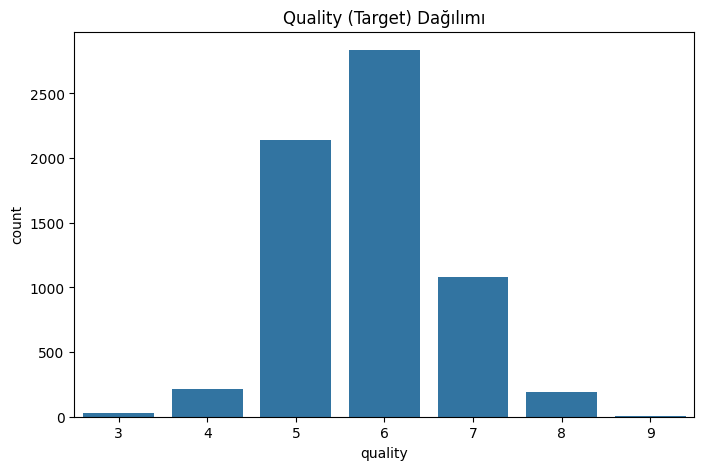

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# target sınıf dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Quality (Target) Dağılımı')
plt.show()


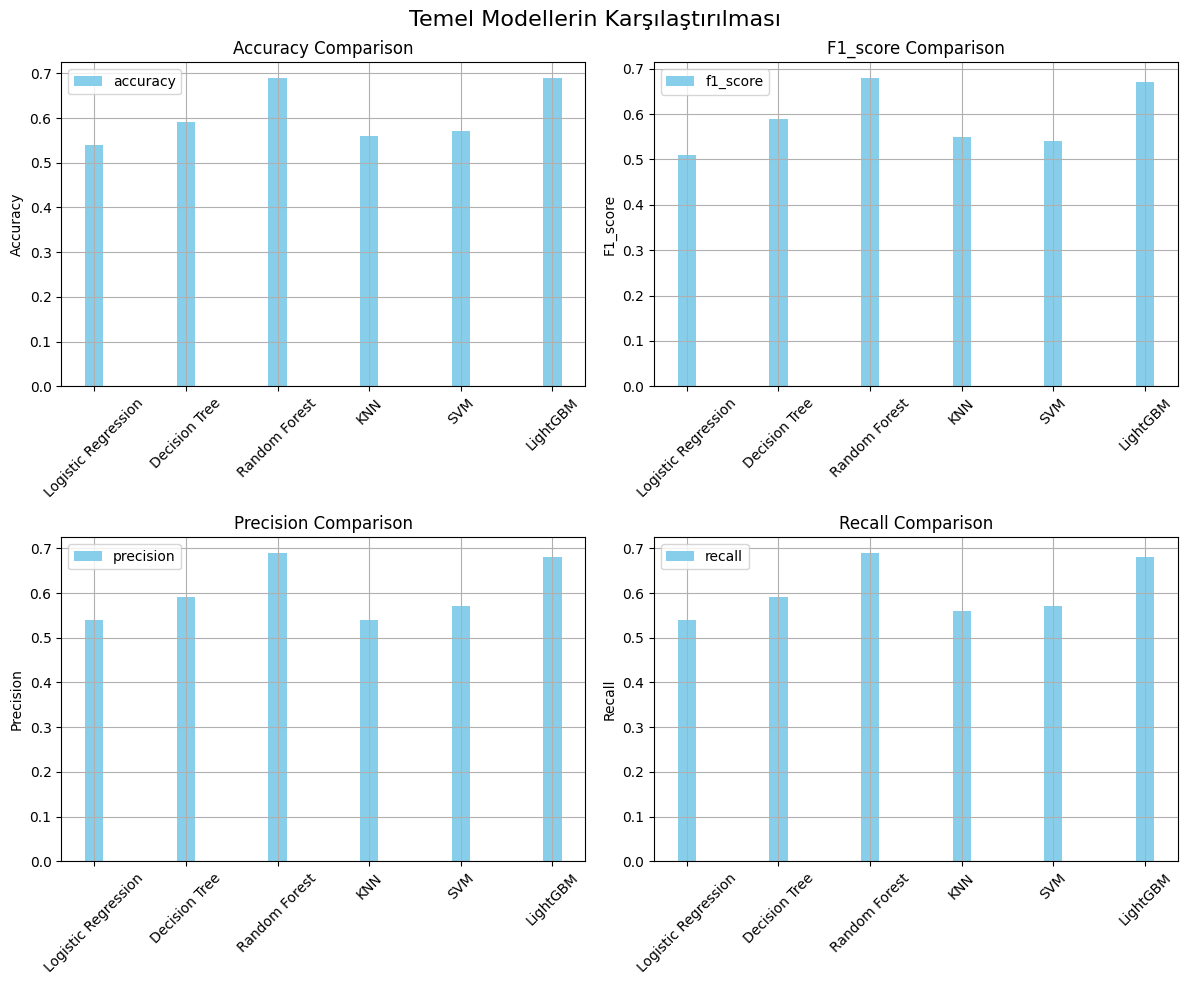

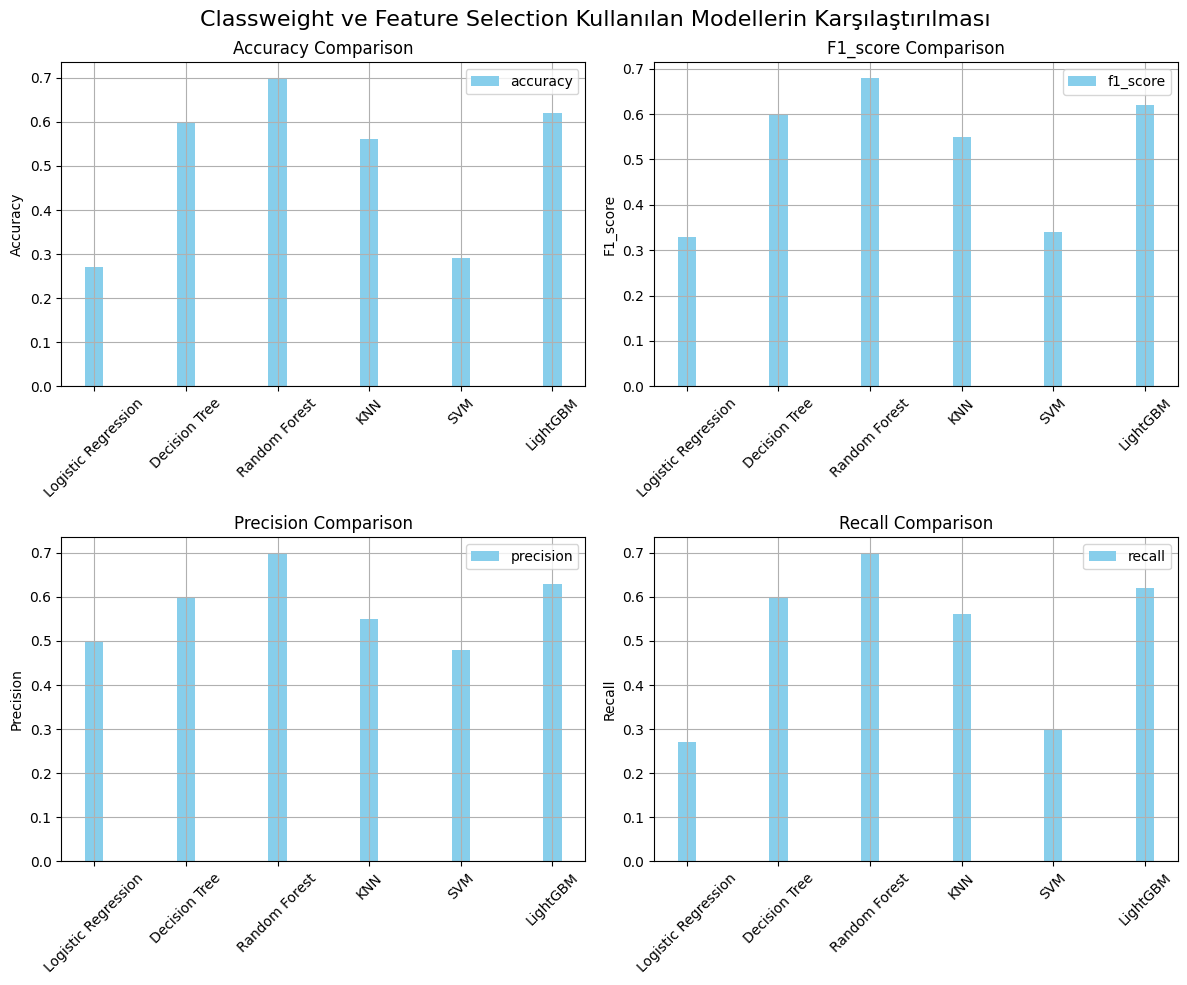

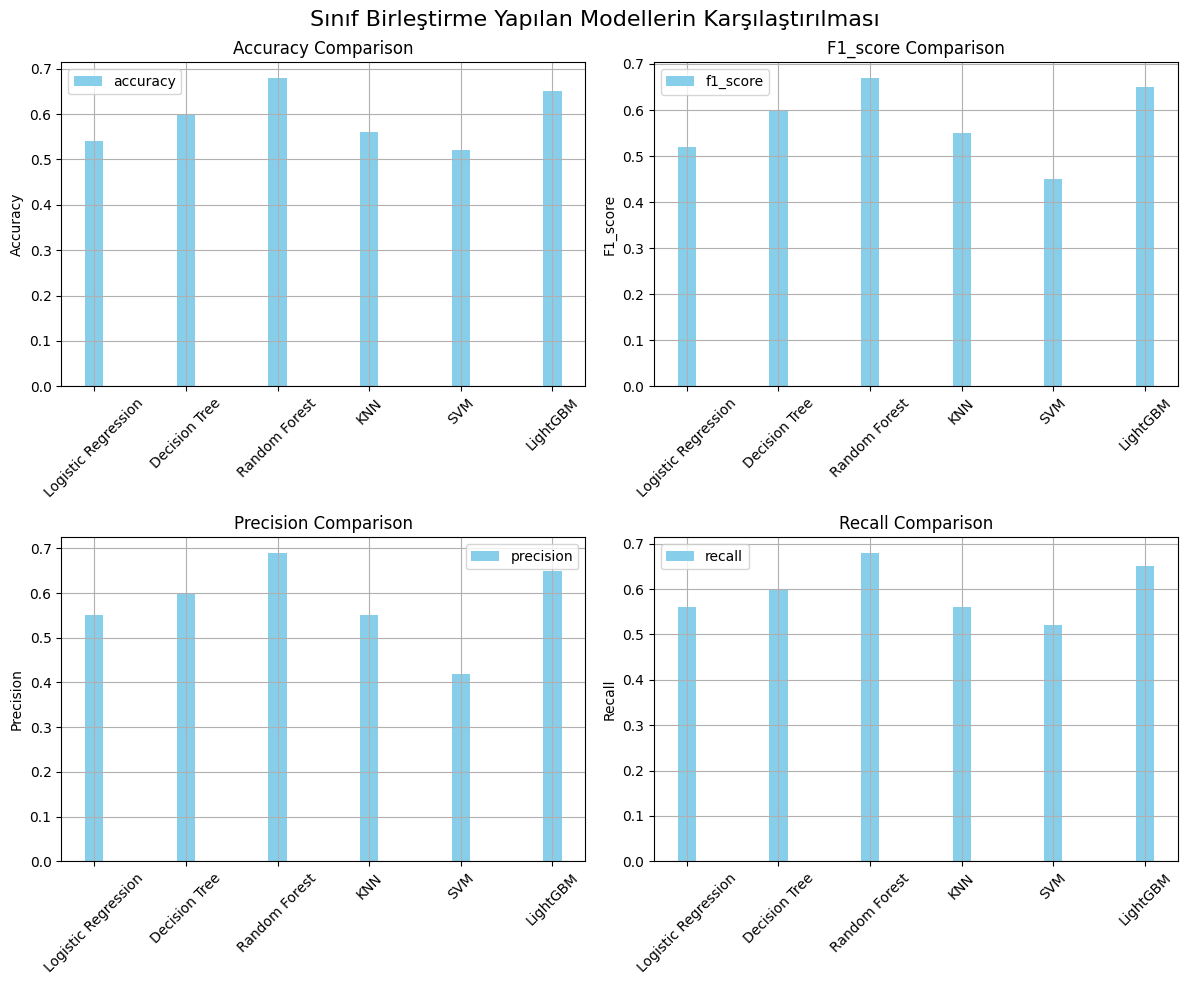

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(models_dict, title):
    """
    Her bir senaryo için modellerin performans metriklerini bar grafiği ile görselleştirme.
    """
    metrics = ['accuracy', 'f1_score', 'precision', 'recall']
    x = np.arange(len(models_dict))
    width = 0.2

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)

    for i, metric in enumerate(metrics):
        ax = axes[i // 2, i % 2]
        values = [models_dict[model][metric] for model in models_dict]
        ax.bar(x, values, width=width, color='skyblue', label=metric)
        ax.set_xticks(x)
        ax.set_xticklabels(models_dict.keys(), rotation=45)
        ax.set_title(f'{metric.capitalize()} Comparison')
        ax.set_ylabel(metric.capitalize())
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# 1. Temel modeller
base_models = {
    'Logistic Regression': {'accuracy': 0.54, 'f1_score': 0.51, 'precision': 0.54, 'recall': 0.54},
    'Decision Tree': {'accuracy': 0.59, 'f1_score': 0.59, 'precision': 0.59, 'recall': 0.59},
    'Random Forest': {'accuracy': 0.69, 'f1_score': 0.68, 'precision': 0.69, 'recall': 0.69},
    'KNN': {'accuracy': 0.56, 'f1_score': 0.55, 'precision': 0.54, 'recall': 0.56},
    'SVM': {'accuracy': 0.57, 'f1_score': 0.54, 'precision': 0.57, 'recall': 0.57},
    'LightGBM': {'accuracy': 0.69, 'f1_score': 0.67, 'precision': 0.68, 'recall': 0.68}
}

# 2. Class weight ve feature selection kullanılan modeller
class_weight_fs_models = {
    'Logistic Regression': {'accuracy': 0.27, 'f1_score': 0.33, 'precision': 0.50, 'recall': 0.27},
    'Decision Tree': {'accuracy': 0.60, 'f1_score': 0.60, 'precision': 0.60, 'recall': 0.60},
    'Random Forest': {'accuracy': 0.70, 'f1_score': 0.68, 'precision': 0.70, 'recall': 0.70},
    'KNN': {'accuracy': 0.56, 'f1_score': 0.55, 'precision': 0.55, 'recall': 0.56},
    'SVM': {'accuracy': 0.29, 'f1_score': 0.34, 'precision': 0.48, 'recall': 0.30},
    'LightGBM': {'accuracy': 0.62, 'f1_score': 0.62, 'precision': 0.63, 'recall': 0.62}
}

# 3. Sınıf birleştirme yapılan modeller
merged_class_models = {
    'Logistic Regression': {'accuracy': 0.54, 'f1_score': 0.52, 'precision': 0.55, 'recall': 0.56},
    'Decision Tree': {'accuracy': 0.60, 'f1_score': 0.60, 'precision': 0.60, 'recall': 0.60},
    'Random Forest': {'accuracy': 0.68, 'f1_score': 0.67, 'precision': 0.69, 'recall': 0.68},
    'KNN': {'accuracy': 0.56, 'f1_score': 0.55, 'precision': 0.55, 'recall': 0.56},
    'SVM': {'accuracy': 0.52, 'f1_score': 0.45, 'precision': 0.42, 'recall': 0.52},
    'LightGBM': {'accuracy': 0.65, 'f1_score': 0.65, 'precision': 0.65, 'recall': 0.65}
}


plot_comparison(base_models, "Temel Modellerin Karşılaştırılması")
plot_comparison(class_weight_fs_models, "Classweight ve Feature Selection Kullanılan Modellerin Karşılaştırılması")
plot_comparison(merged_class_models, "Sınıf Birleştirme Yapılan Modellerin Karşılaştırılması")


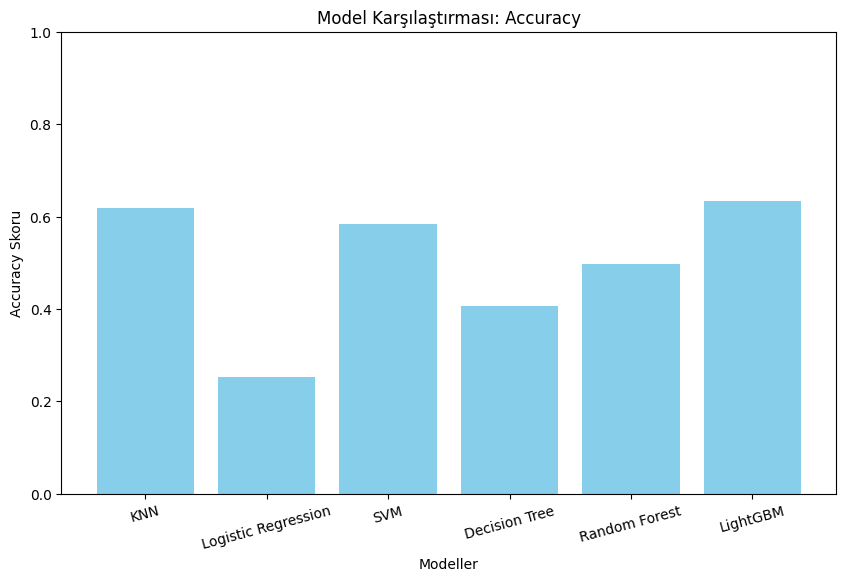

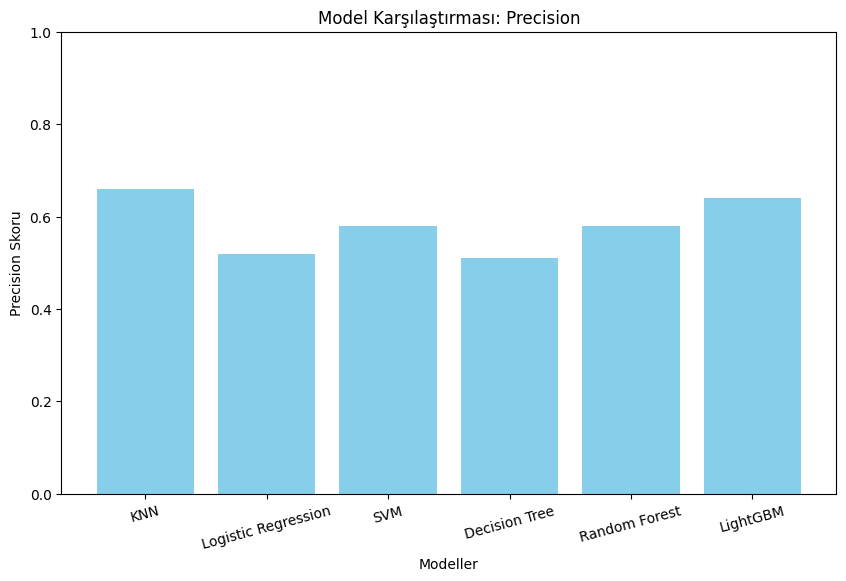

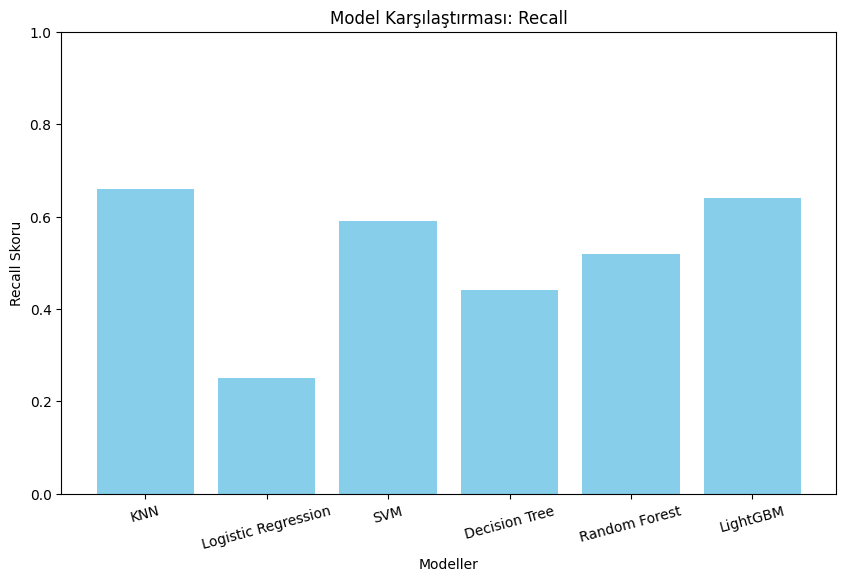

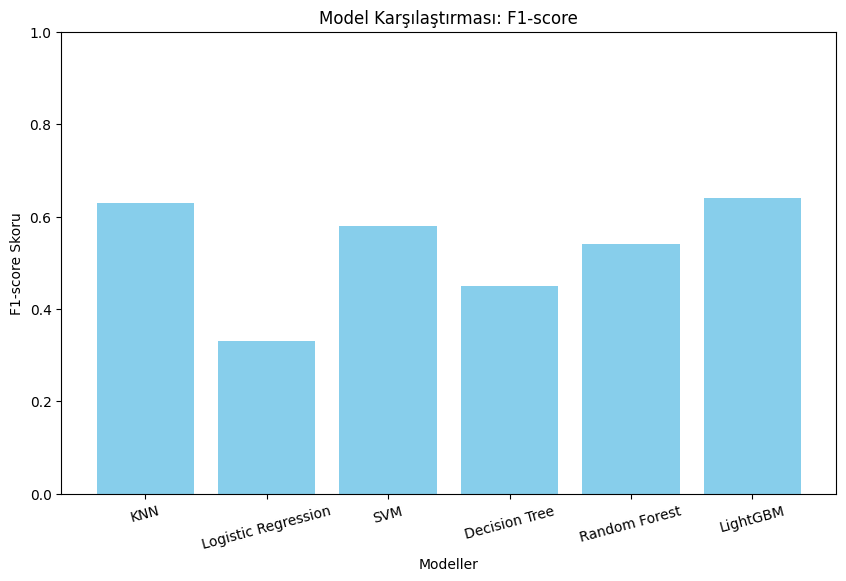

In [38]:
import matplotlib.pyplot as plt

# Optimize edilmiş model sonuçları
optimized_models = {
    'KNN': {'accuracy': accuracy_knn_optimized, 'precision': 0.66, 'recall': 0.66, 'f1-score': 0.63},  # Değiştirilen ad
    'Logistic Regression': {'accuracy': accuracy_logistic_optimized, 'precision': 0.52, 'recall': 0.25, 'f1-score': 0.33},
    'SVM': {'accuracy': accuracy_svm_optimized, 'precision': 0.58, 'recall': 0.59, 'f1-score': 0.58},
    'Decision Tree': {'accuracy': accuracy_tree_optimized, 'precision': 0.51, 'recall': 0.44, 'f1-score': 0.45},
    'Random Forest': {'accuracy': accuracy_rf_optimized, 'precision': 0.58, 'recall': 0.52, 'f1-score': 0.54},
    'LightGBM': {'accuracy': accuracy_lgbm_optimized, 'precision': 0.64, 'recall': 0.64, 'f1-score': 0.64}
}

# Performans metriklerini görselleştirme
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(optimized_models.keys(), [model[metric] for model in optimized_models.values()], color='skyblue')
    plt.title(f"Model Karşılaştırması: {metric.capitalize()}")
    plt.xlabel("Modeller")
    plt.ylabel(f"{metric.capitalize()} Skoru")
    plt.xticks(rotation=15)
    plt.ylim(0, 1)  # 0-1 aralığında olması için
    plt.show()


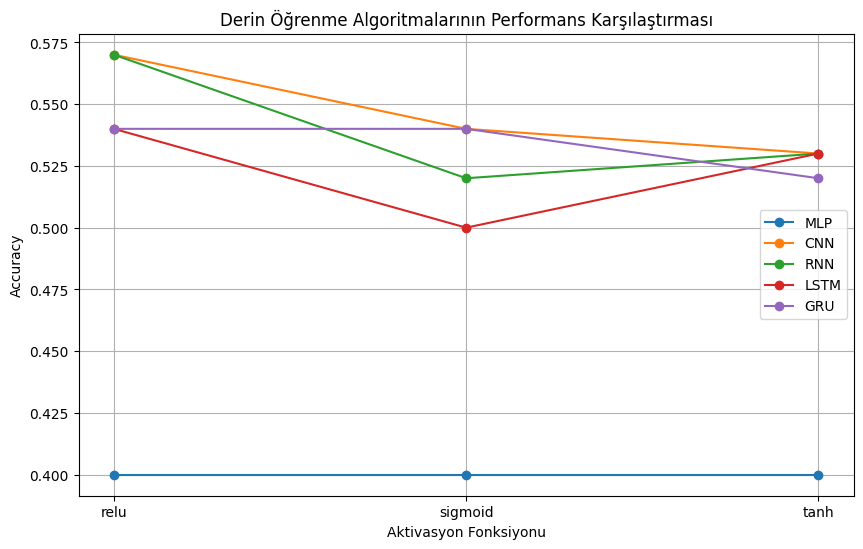

In [39]:
import matplotlib.pyplot as plt

# Performans metrikleri (örnek değerlere göre doldurulacak)
deep_learning_results = {
    'MLP': {'relu': 0.40, 'sigmoid': 0.40, 'tanh': 0.40},
    'CNN': {'relu': 0.57, 'sigmoid': 0.54, 'tanh': 0.53},
    'RNN': {'relu': 0.57, 'sigmoid': 0.52, 'tanh': 0.53},
    'LSTM': {'relu': 0.54, 'sigmoid': 0.50, 'tanh': 0.53},
    'GRU': {'relu': 0.54, 'sigmoid': 0.54, 'tanh': 0.52}
}

# Grafik çizimi
plt.figure(figsize=(10, 6))
for model, activations in deep_learning_results.items():
    plt.plot(activations.keys(), activations.values(), label=model, marker='o')

plt.title('Derin Öğrenme Algoritmalarının Performans Karşılaştırması')
plt.xlabel('Aktivasyon Fonksiyonu')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


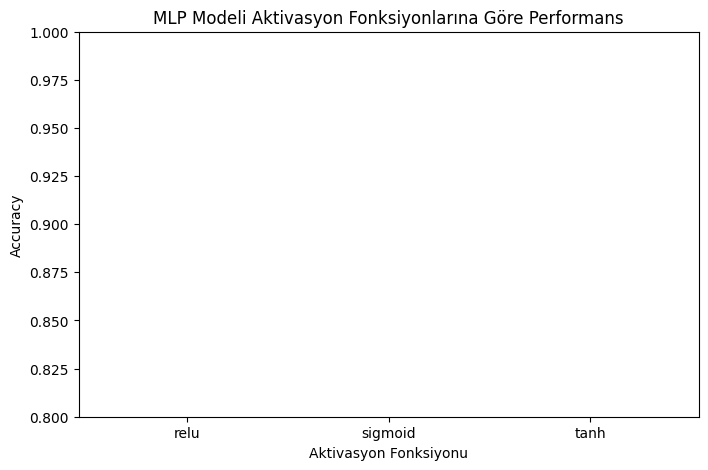

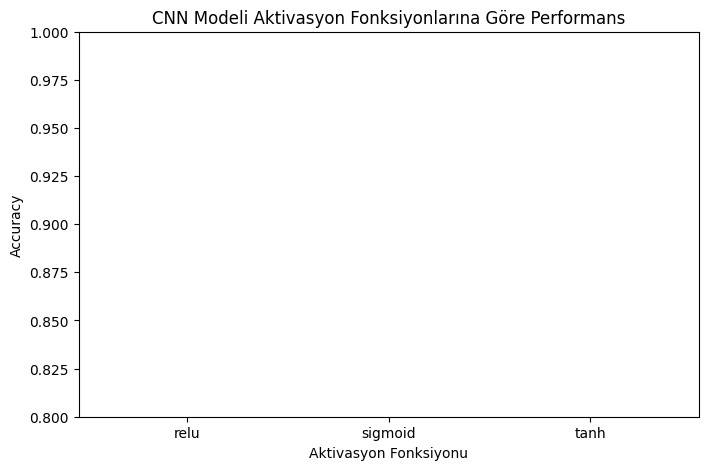

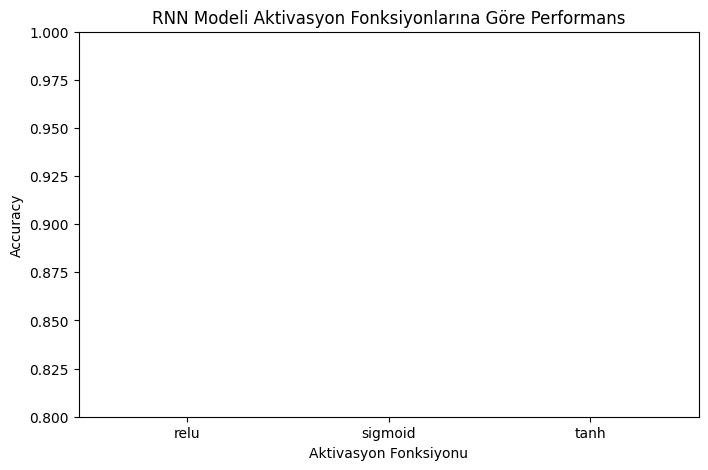

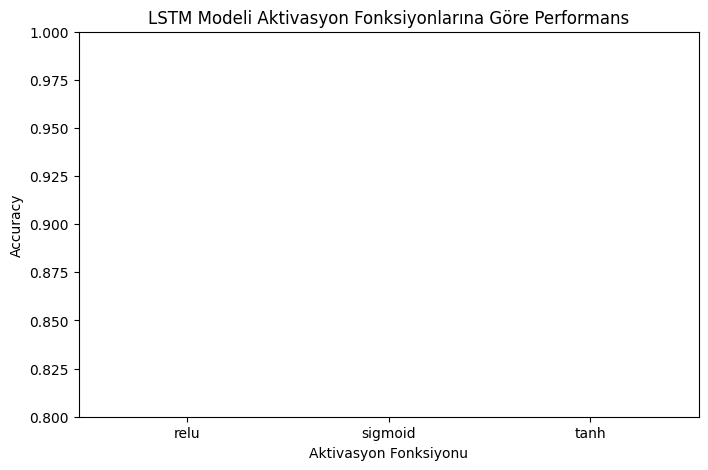

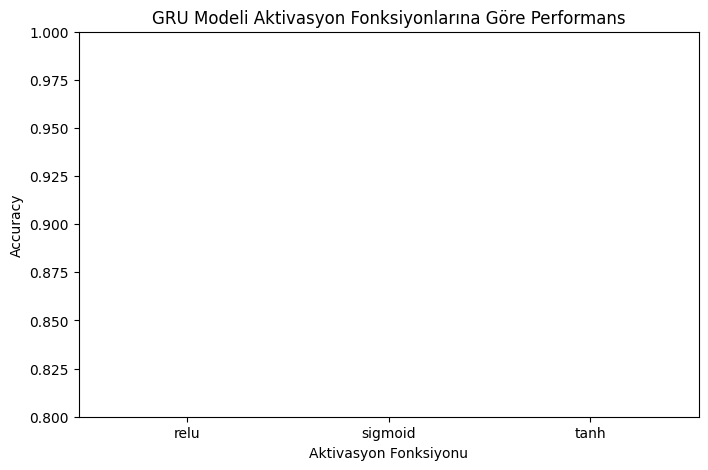

In [40]:
# Tek tek modeller için karşılaştırma grafiği
for model, activations in deep_learning_results.items():
    plt.figure(figsize=(8, 5))
    plt.bar(activations.keys(), activations.values(), color='skyblue')
    plt.title(f'{model} Modeli Aktivasyon Fonksiyonlarına Göre Performans')
    plt.xlabel('Aktivasyon Fonksiyonu')
    plt.ylabel('Accuracy')
    plt.ylim(0.8, 1.0)  # Ölçeği düzenleyebilirsiniz
    plt.show()
